In [1]:
import numpy as np               # used for multidimensional arrays
import pandas as pd              # used for import the dataset
import matplotlib.pyplot as plt  # used for visualising graphs

#this will make your plot outputs appear and be stored within the notebook
%matplotlib inline

In [2]:
adult = pd.read_csv("adult.csv")

In [3]:
del adult['fnlwgt']

In [4]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
adult['workclass'] = LE.fit_transform(adult['workclass'])
adult['education'] = LE.fit_transform(adult['education'])
adult['marital-status'] = LE.fit_transform(adult['marital-status'])
adult['occupation'] = LE.fit_transform(adult['occupation'])
adult['relationship'] = LE.fit_transform(adult['relationship'])
adult['race'] = LE.fit_transform(adult['race'])
adult['sex'] = LE.fit_transform(adult['sex'])
adult['native-country'] = LE.fit_transform(adult['native-country'])
adult['income'] = LE.fit_transform(adult['income'])

In [7]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [8]:
adult.shape

(32561, 14)

In [9]:
#export modified data to csv
adult.to_csv('adult_num.csv')

In [10]:
X = adult.iloc[:,:-1].values    # predictor attributes
y = adult.iloc[:,-1].values     # target attribute

In [11]:
adult.iloc[:,:-1].values

array([[39,  6,  9, ...,  0, 40, 38],
       [50,  5,  9, ...,  0, 13, 38],
       [38,  3, 11, ...,  0, 40, 38],
       ...,
       [58,  3, 11, ...,  0, 40, 38],
       [22,  3, 11, ...,  0, 20, 38],
       [52,  4, 11, ...,  0, 40, 38]])

In [12]:
adult.iloc[:,-1].values

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
X = adult.iloc[:,:-1].values    # predictor attributes
y = adult.iloc[:,-1].values     # target attribute

In [14]:
adult['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier

#default criterion/attribute selection metric is 'gini'
#DT = DecisionTreeClassifier(random_state= 0)
#To change the criterion to information gain see below:
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)

In [17]:
DT.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[5466,  693],
       [ 788, 1194]])

<Axes: >

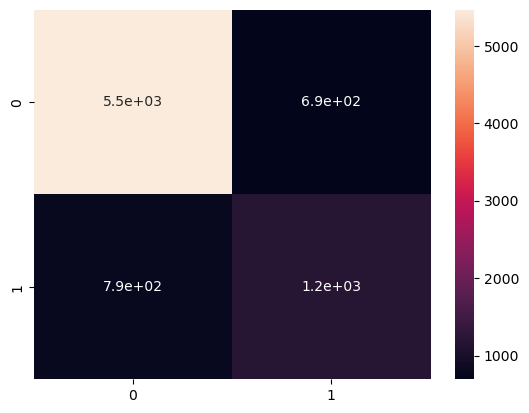

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [21]:
# print the Confusion Matrix in a DataFrame
from sklearn.metrics import confusion_matrix
unique_label = np.unique([y_test, y_pred])
cm=confusion_matrix(y_test, y_pred, labels=unique_label )
pd.DataFrame(cm, columns=unique_label)

,0,1
0,5466,693
1,788,1194


In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[5466  693]
 [ 788 1194]] 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6159
           1       0.63      0.60      0.62      1982

    accuracy                           0.82      8141
   macro avg       0.75      0.74      0.75      8141
weighted avg       0.82      0.82      0.82      8141

Accuracy: 0.8180813167915489
AUC: 0.7449517651066122


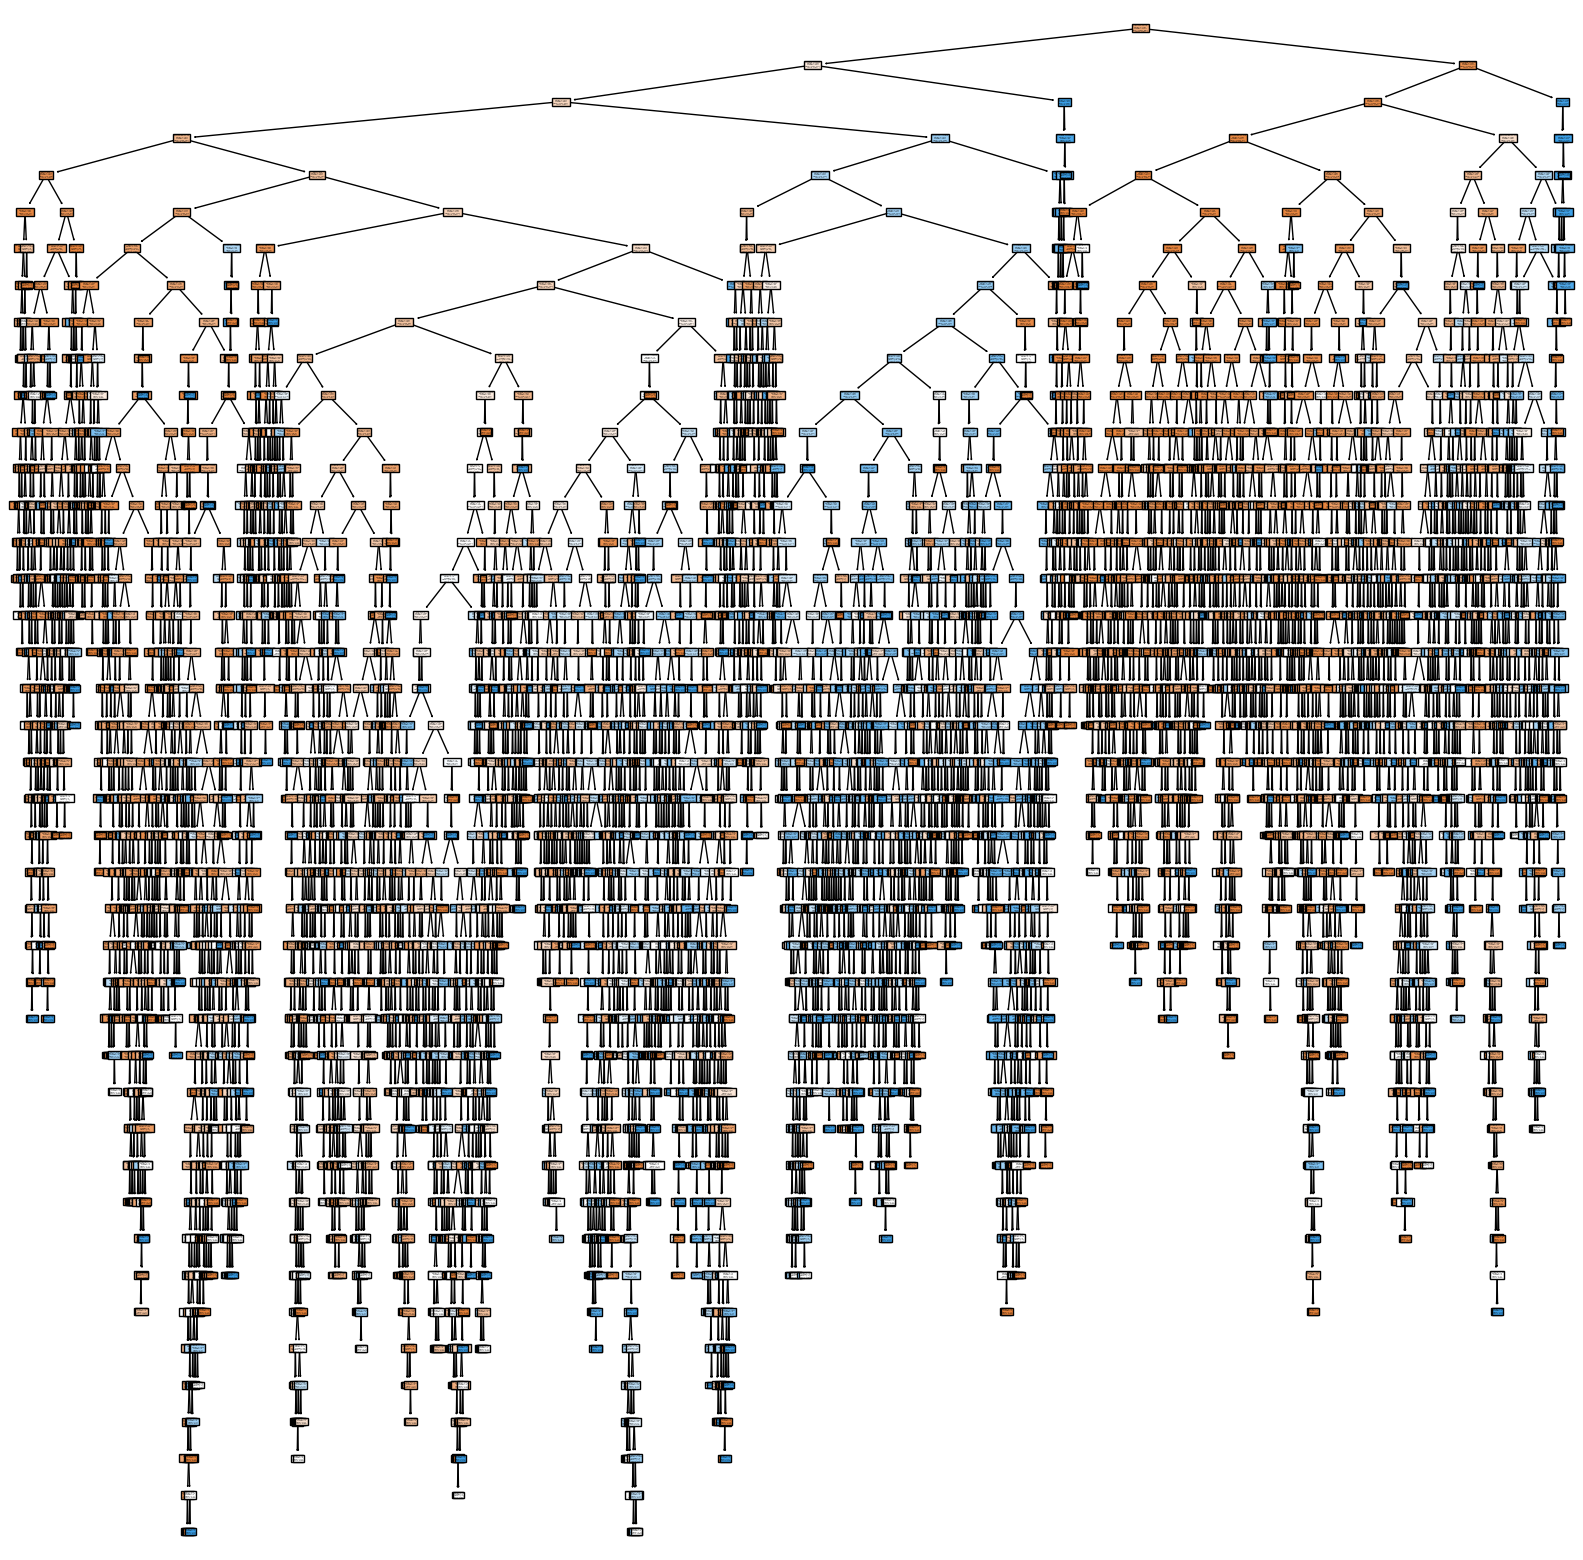

In [22]:
#visualise the tree
from sklearn import tree

plt.figure(figsize=(20,20))
features = adult.columns
classes = ['<=50k','>50k']
tree.plot_tree(DT,feature_names=features,class_names=classes,filled=True)
plt.show()

In [23]:
#minimal cost-complexity pruning
DT1 = DecisionTreeClassifier(random_state=0)

path = DT1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

DTs = []
for ccp_alpha in ccp_alphas:
    DT = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(X_train, y_train)
    DTs.append(DT)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        DTs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.059370914360095894


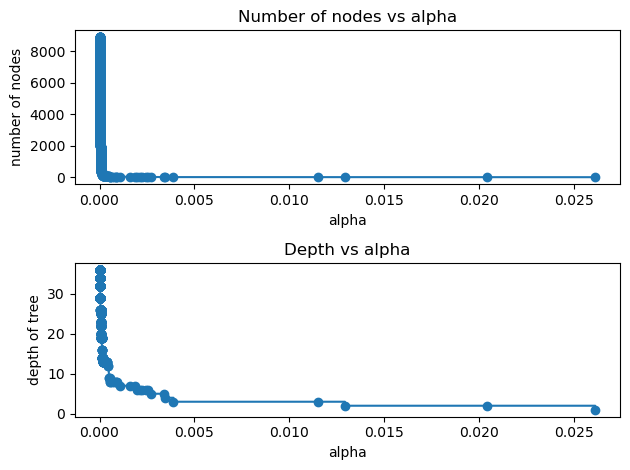

In [24]:
#remove the last element in DTs and ccp_alphas, because it is the trivial tree with only one node
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]

#plots to show that the number of nodes and tree depth decreases as alpha increases
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

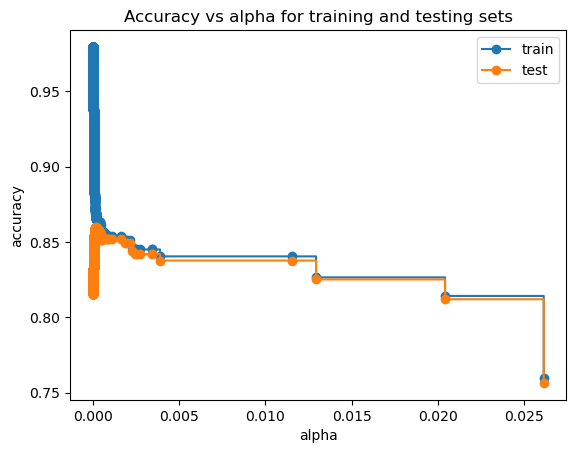

In [25]:
train_scores = [DT.score(X_train, y_train) for DT in DTs]
test_scores = [DT.score(X_test, y_test) for DT in DTs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#when ccp_alpha is set to zero and the other parameters are kept on default values,
# the tree overfits, leading to an almost 100% training accuracy and
# aproximately 86% testing accuracy.

#as alpha increases, more of the tree is pruned, creating a decision tree that generalizes better

#the best perfomance on the test set is obtained for ccp_alpha between 0.000 and 0.0025,
# after which the graphs show underfitting, i.e., decrease in both training and test scores

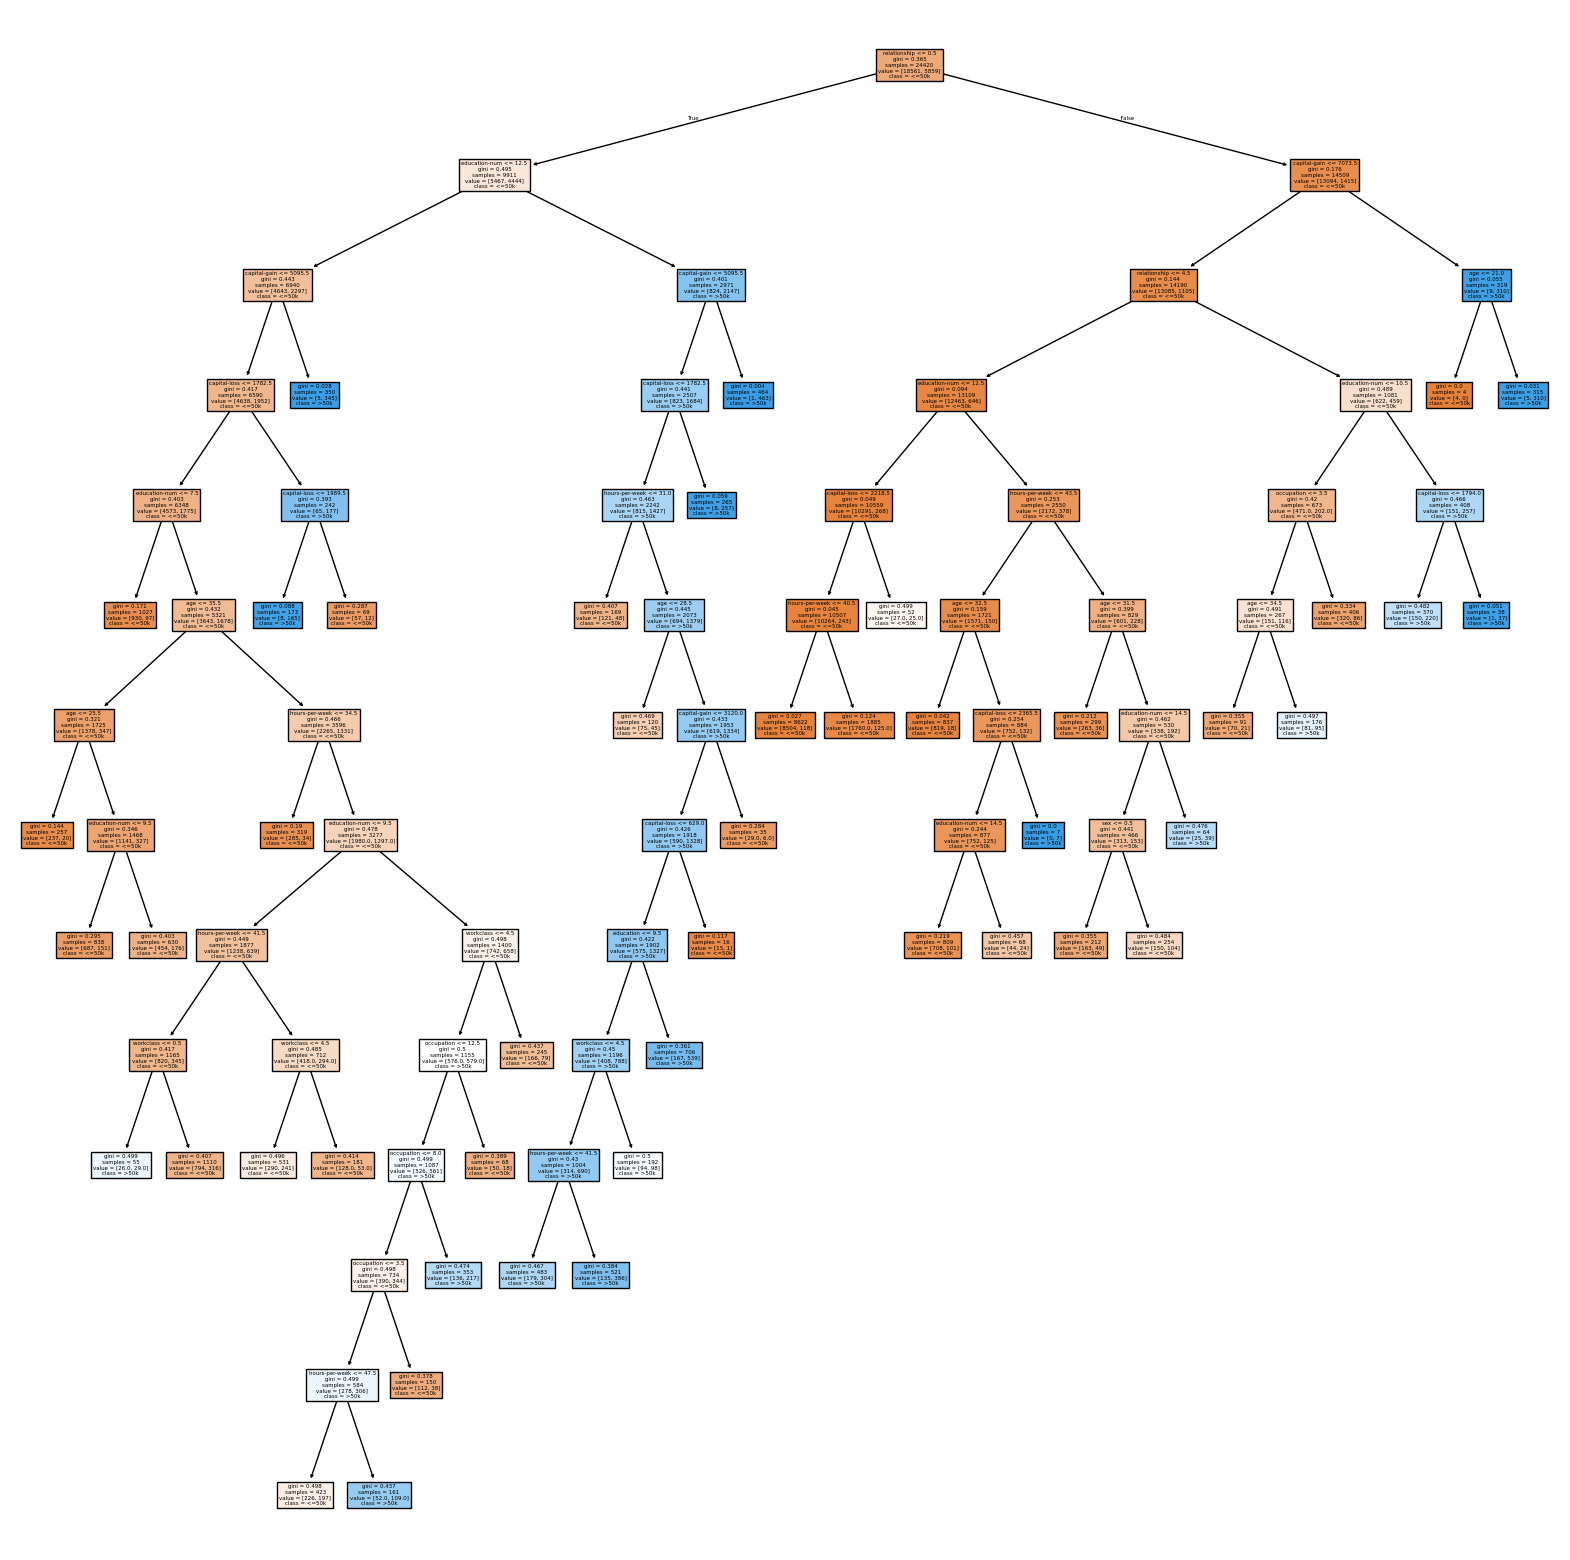

In [26]:
#visualise the prunned tree; notice the smaller size of the tree

DT2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00025)
DT2.fit(X_train, y_train)

plt.figure(figsize=(20,20))
features = adult.columns
classes = ['<=50k','>50k']
tree.plot_tree(DT2,feature_names=features,class_names=classes,filled=True)
plt.show()

In [27]:
#cross-validation
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#accuracy scores for each fold
scores = cross_val_score(DT, X, y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80810562 0.81941032 0.82248157 0.81081081 0.82186732 0.81633907
 0.81633907 0.83138821 0.8289312  0.81603194]
Accuracy: 0.82 (+/- 0.01)


In [28]:
#performance metrics

from sklearn.model_selection import cross_val_predict

#predicted values
y_pred = cross_val_predict(DT, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[21913  2807]
 [ 3081  4760]] 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     24720
           1       0.63      0.61      0.62      7841

    accuracy                           0.82     32561
   macro avg       0.75      0.75      0.75     32561
weighted avg       0.82      0.82      0.82     32561

Accuracy: 0.8191701729062375
AUC: 0.7467568226965635


In [29]:
#print the cross validation performance metrics
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mean_score = cross_val_score(DT, X, y, scoring="recall", cv = 10).mean()
std_score = cross_val_score(DT, X, y, scoring="recall", cv = 10).std()
print("Recall: %0.2f (+/- %0.2f)" % (mean_score, std_score * 2))

mean_score = cross_val_score(DT, X, y, scoring="precision", cv = 10).mean()
std_score = cross_val_score(DT, X, y, scoring="precision", cv = 10).std()
print("Precision: %0.2f (+/- %0.2f)" % (mean_score, std_score * 2))

mean_score = cross_val_score(DT, X, y, scoring="f1_macro", cv = 10).mean()
std_score = cross_val_score(DT, X, y, scoring="f1_macro", cv = 10).std()
print("F-score: %0.2f (+/- %0.2f)" % (mean_score, std_score * 2))

mean_score = cross_val_score(DT, X, y, scoring="f1_micro", cv = 10).mean()
std_score = cross_val_score(DT, X, y, scoring="f1_micro", cv = 10).std()
print("Micro F-score/accuracy: %0.2f (+/- %0.2f)" % (mean_score, std_score * 2))

Accuracy: 0.82 (+/- 0.01)
Recall: 0.61 (+/- 0.04)
Precision: 0.63 (+/- 0.03)
F-score: 0.75 (+/- 0.02)
Micro F-score/accuracy: 0.82 (+/- 0.01)


In [30]:
scores1=cross_val_score(DT, X, y, scoring="recall", cv = 10)
scores1

array([0.58598726, 0.59056122, 0.60331633, 0.5752551 , 0.63010204,
       0.59821429, 0.60331633, 0.63647959, 0.62117347, 0.62627551])

In [31]:
for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
        cvs = cross_val_score(DT, X, y, scoring=score, cv=10).mean()
        print(score + " : "+ str(cvs))

roc_auc : 0.7682014437824787
f1 : 0.617793627756513
precision : 0.6291279716294217
recall : 0.6070681138697517
accuracy : 0.8191705127266996


In [32]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

#minkowski=distance formula and p=2 gives the Eucledian distance; these are the default values
#knn=KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
knn= KNeighborsClassifier(n_neighbors=5)

#fit the clasifier to the data
knn.fit(X_train,y_train)

#predicted values using the knn model
y_pred=knn.predict(X_test)

#performance metrics
from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[5552  607]
 [ 754 1228]] 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6159
           1       0.67      0.62      0.64      1982

    accuracy                           0.83      8141
   macro avg       0.77      0.76      0.77      8141
weighted avg       0.83      0.83      0.83      8141

Accuracy: 0.832821520697703
AUC: 0.7605106127251121


In [33]:
# try k=1 through k=5 and record accuracy
k_range = range(1, 6)

# create a Python dictionary using [] or dict()
scores = []

# loop through the k values; append the scores in the dictionary
for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.8096056995455104, 0.8329443557302543, 0.8303648200466773, 0.8387176022601646, 0.832821520697703]


Text(0, 0.5, 'Accuracy')

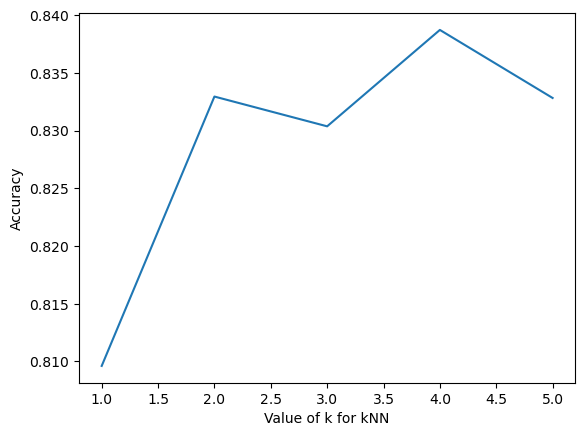

In [34]:
# plot the relationship between k values and accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

In [35]:
#kNN cross-validation
from sklearn.model_selection import cross_val_score
kNN = KNeighborsClassifier(n_neighbors=4)

#accuracy scores for each fold
scores = cross_val_score(kNN, X, y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84494934 0.83630221 0.84674447 0.84428747 0.84275184 0.84121622
 0.83906634 0.8544226  0.84858722 0.84090909]
Accuracy: 0.84 (+/- 0.01)


In [36]:
#performance metrics

from sklearn.model_selection import cross_val_predict

#predicted values
y_pred = cross_val_predict(kNN, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[23277  1443]
 [ 3639  4202]] 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     24720
           1       0.74      0.54      0.62      7841

    accuracy                           0.84     32561
   macro avg       0.80      0.74      0.76     32561
weighted avg       0.84      0.84      0.83     32561

Accuracy: 0.8439237124166948
AUC: 0.738763623311867
